# Práctica 1: Perceptrón multicapa.

Tu jefe pidió a RH que recolectara datos de desempeño de tus compañeros, los resultados se almacenaron en un csv. El punto critico de estos datos es la satisfacción del empleado, entonces ¿Podremos estimar la satisfacción de los empleados con los datos recabados?.

In [2]:
import sys
!{sys.executable} -m pip install pandas matplotlib scikit-learn tensorflow


  Using cached pandas-2.3.3-cp310-cp310-win_amd64.whl (11.3 MB)
  Using cached matplotlib-3.10.8-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl (8.9 MB)
  Using cached tensorflow-2.20.0-cp310-cp310-win_amd64.whl (331.7 MB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)
  Using cached pillow-12.1.0-cp310-cp310-win_amd64.whl (7.0 MB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl (121 kB)
  Using cached fonttools-4.61.1-cp310-cp310-win_amd64.whl (1.6 MB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
  Using cached joblib-1.5.3-py3-none-any.whl (309 k


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models


df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

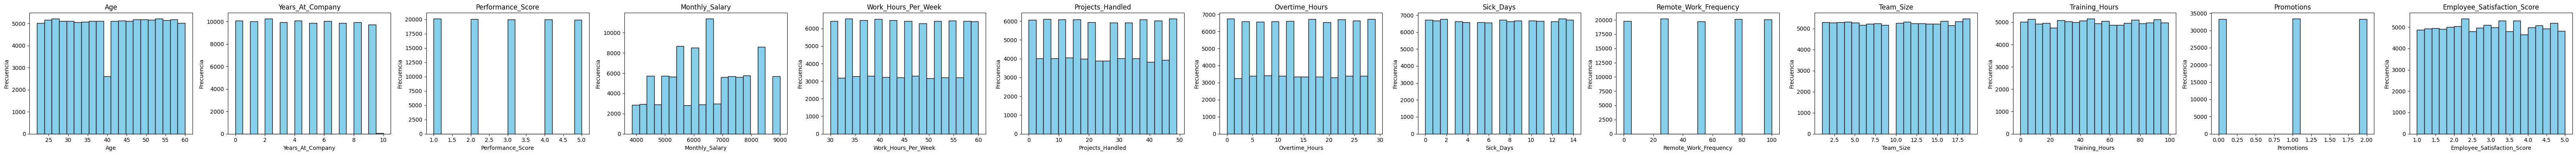

In [4]:
# Filtrar las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).drop('Employee_ID',axis=1)


# Si numeric_columns es un Index, conviértelo a lista
cols = list(numeric_columns)

fig, axes = plt.subplots(1, len(cols), figsize=(5 * len(cols), 4))

for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Problemas**, tenemos distribuciones con picos, esos nos indica categorías. Por otro lado, tenemos variables con "valles" en su distribución (distribuciones multimodales) por lo que resultaría óptimo aplicar técnicas de feature engeneering. Por último tenemos distribuciones uniformes, por lo que cada una requeriría un procesamiento indivudual, hagamos la vista gorda e intentemos ajustar un MLP con estos datos, solo estandaricemos nuestros datos.

---

## Implementación de Red:

To**memos los datos numéricos como nuestra variable X, y la variable objetivo como ***'Employee_Satisfaction_Score'***.
- **Actividad 1**: Para todos los strings ``'@modif@'`` que aparescan en el siguiente bloque de código cámbialos para que el código funcione.

In [5]:
# Variables X e y
X = numeric_columns.drop('Employee_Satisfaction_Score', axis=1)
y = numeric_columns['Employee_Satisfaction_Score']

# Convertimos la variable objetivo a 5 categorías
y = y.apply(lambda x: round(x) - 1)

# Estandarización
scaler = StandardScaler()
X_standar = scaler.fit_transform(X)

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_standar, y, test_size=0.33, random_state=42
)

# One-hot encoding
y_onehot_train = tf.keras.utils.to_categorical(y_train, 5)
y_onehot_test = tf.keras.utils.to_categorical(y_test, 5)


- **Actividad 2:** Implementa 3 arquitecturas de MLP, cada una con su propio nombre, cambiando la estructura de dichas arquitecturas (capas, neuronas por capa, función de activación, etc). 

In [ ]:
# En las siguientes celdas, construye tu modelo con tensorflow.keras solo la arquitectura

In [6]:
model_1 = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(5, activation='softmax')
])


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model_2 = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')
])


In [8]:
model_3 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')
])


- **Actividad 3:** Compila y ajusta tus tres modelos con sus respectivos hiperparámetros.

In [ ]:
# En las siguientes celdas, compila y entrena el modelo

In [9]:
model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    X_train, y_onehot_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_onehot_test)
)


Epoch 1/30
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2487 - loss: 1.5720 - val_accuracy: 0.2551 - val_loss: 1.5623
Epoch 2/30
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2558 - loss: 1.5582 - val_accuracy: 0.2528 - val_loss: 1.5598
Epoch 3/30
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2591 - loss: 1.5566 - val_accuracy: 0.2523 - val_loss: 1.5592
Epoch 4/30
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2603 - loss: 1.5558 - val_accuracy: 0.2554 - val_loss: 1.5593
Epoch 5/30
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2624 - loss: 1.5553 - val_accuracy: 0.2539 - val_loss: 1.5595
Epoch 6/30
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2618 - loss: 1.5548 - val_accuracy: 0.2540 - val_loss: 1.5588
Epoch 7/30
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2614 - loss: 1.5546 - val_accuracy: 0.2531 - val_loss: 1.5593
Epoch 8/30
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2649 - loss: 1.5543 

- **Actividad 4:** Sube tus cambios al repositorio, envía el link de tu repositorio a la actividad 2 de tu checkpoint 2 y contesta las preguntas de dicha actividad.